# Lab 6: Predicting Social Mobility using Trees and Regression

## Methods/concepts: decision trees, prediction, in-sample vs. out of sample

**Name:** Shreya Chaturvedi

**Email:** shreyachaturvedi@hks.harvard.edu

**HUID:** 31575036

**Lab:** Thursday 3pm at HKS

**Date:** March 28, 2024

**LAB DESCRIPTION**

This is the first of three labs on prediction policy questions. In this
lab, you will predict upward mobility using *decision trees* and
*multivariable regression*. The measure of upward mobility that we will
focus on is **Statistic 1: Absolute Mobility at the 25th Percentile** in
each commuting zone (**kfr_pooled_pooled_p25**). For more details on the variables
included in these data, see [Table 1](#Table1).

The focus of this lab will be on the *concepts* and not the coding. In
the R labs, we will start from starter scripts that can either be run on
your computer or the Ec 50 Jupyter Hub.

## **QUESTIONS**

1.  Why do we split our data into “test” and “training” datasets for
    prediction applications?

In [1]:
# QUESTION 1 Code


**Question 1 Answer**

We split our data into "test" and "training" datasets for prediction applications primarily to evaluate how well our model can generalize to new, unseen data. The training dataset is used to teach the model the underlying patterns and relationships within the data, while the test dataset, which is held out and kept separate from the training process, allows us to assess the model's performance on examples it has never encountered before. This separation is crucial because if we were to evaluate the model solely on the data it was trained on, we would have no way of knowing whether it has truly learned generalizable concepts or if it has simply memorized the specific examples in the training set. By measuring performance on the test set, we can get an honest estimate of how well the model will extend to real-world data beyond just the finite training examples.

2.  Now turn to the .R starter script and the mobility.dta data set.
    Just like in Lab 1 where we randomly assigned observations to
    treatment and control groups, in this week’s lab we will randomly
    assign half of the data into a “test” and half into a “training”
    subsamples as follows:
    1. First, [set the
        “seed”](https://blog.stata.com/2016/03/10/how-to-generate-random-numbers-in-stata/)
        using your Harvard University ID number (set.seed(12345) in R),
        which will make your simulation reproducible, but different from
        your classmates’ simulations. Then assign to each observation a
        random number drawn uniformly between 0 and 1.
    2. Generate a new variable *train_flag* that equals 1 (“training
        sample”) if the number generated in part a is greater than or
        equal to 0.5, and otherwise equals 0 when the number is less
        than 0.5 (“test sample”). How many observations are in the
        training sample? How many are in your test sample?

In [2]:
#clear the workspace
rm(list=ls()) # removes all objects from the environment 

#Install and load haven package
if (!require(haven)) install.packages("haven"); library(haven)
if (!require(rpart)) install.packages("rpart"); library(rpart)

#Load stata data set
download.file("https://raw.githubusercontent.com/ekassos/ec50_s24/main/mobility.dta", "mobility.dta", mode = "wb")
mobility <- read_dta("mobility.dta")

# QUESTION 2 Code
# Set a seed for reproducibility based on my Harvard ID
set.seed(31575036)

# Assign a random number between 0 and 1 to each row in the 'mobility' data frame
mobility$random_num <- runif(nrow(mobility))

# Create a binary flag to identify rows for the training set (50% of the data)
mobility$training_flag <- ifelse(mobility$random_num < 0.5, 1, 0)

# Calculate and report the number of entries in each subset
training_count <- sum(mobility$training_flag)
test_count <- nrow(mobility) - training_count

training_count
test_count
nrow(mobility)

Loading required package: haven

Loading required package: rpart



[1] 352

[1] 389

[1] 741

**Question 2 Answer**

There are 352 and 389 observations in my training and test set respectively. This is inline with roughly 50% of the values in each (which is approximately 370) with some variation due to random sampling. 

3.  Then subset the mobility.dta data set to create two new data frames:
    1. train is the training dataset containing observations where `train_flag=1`
    2. test is the test dataset containing observations where `train_flag=0`

In [3]:
# QUESTION 3 Code

## Create some data frames that just contain the training and test data
train <- subset(mobility, training_flag == 1)
test <- subset(mobility, training_flag == 0)

**Question 3 Answer**

Code as shown above. All the observations with the training flag set to 1 are in the train dataset and other way round for the test dataset. 

4.  Now we will use linear regression to predict upward mobility.
    1. Start by estimating a regression of **kfr_pooled_pooled_p25** on
        at least three predictor variables in the training data. Please
        choose at least three, but you can choose more than three if you
        want. The three that you choose should not include my two
        predictors: 'bowl_per_capita' and 'singleparent_share1990'. Pick
        your own!
    2. Use the estimated coefficients from the regression to predict
        **kfr_pooled_pooled_p25** for Milwaukee, WI, which has cz
        == 24100. For example, in a regression using bowling alleys per
        100,000 residents and single parent families as predictors, we
        could simply use the estimated regression coefficients and the
        fact that Milwaukee, WI has 5.72 bowling alleys per 100,000
        residents and 22.6% single parent families in 1990 to obtain the
        predicted value. What is the prediction error for Milwaukee?
    3. Obtain predictions for the **training data** and create a new
        variable called y_train_predictions_ols.
    4. Obtain predictions for the **test data** and create a new
        variable called y_test_predictions_ols.
    5. Calculate the **root mean squared prediction error** in the
        training data and the test data
    6. Compare the prediction error in the test vs. the training data.
        Which is higher?

In [4]:
# QUESTION 4 Code

#Question 4 Code
#Modified linear regression using variables job growth rate, employment rate, and share of poor people as independent variables
mobilityreg <- lm(kfr_pooled_pooled_p25 ~ job_growth_1990_2010 + emp2000 + poor_share2000, data=train) 
summary(mobilityreg)

### Display data for Milwaukee, WI
summary(subset(mobility, cz == 24100))

#Generate predictions for all observations in the test data
y_test_predictions_ols <- predict(mobilityreg, newdata=test)

#Generate predictions for all observations in the training data
y_train_predictions_ols <- predict(mobilityreg, newdata=train)

#Generate squared prediction errors
OLS_performance_testset <- (test$kfr_pooled_pooled_p25 - y_test_predictions_ols)^2
OLS_performance_trainset <- (train$kfr_pooled_pooled_p25 - y_train_predictions_ols)^2

#Report the root mean squared prediction error
rmspe_test_ols <- sqrt(mean(OLS_performance_testset, na.rm=TRUE))
rmspe_train_ols <- sqrt(mean(OLS_performance_trainset, na.rm=TRUE))

print(paste("The Root Mean Squared Percentage Error (RMSPE) for the test dataset is:", rmspe_test_ols))
print(paste("The Root Mean Squared Percentage Error (RMSPE) for the training dataset is:", rmspe_train_ols))


Call:
lm(formula = kfr_pooled_pooled_p25 ~ job_growth_1990_2010 + emp2000 + 
    poor_share2000, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0651  -3.2940  -0.1796   2.9274  18.1049 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          27.77955    4.70758   5.901 8.57e-09 ***
job_growth_1990_2010 -0.04892    0.01389  -3.522 0.000486 ***
emp2000              27.72915    6.69798   4.140 4.36e-05 ***
poor_share2000       -4.57024    7.46011  -0.613 0.540526    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.16 on 348 degrees of freedom
Multiple R-squared:  0.123,	Adjusted R-squared:  0.1154 
F-statistic: 16.27 on 3 and 348 DF,  p-value: 6.465e-10


       cz           czname          kfr_pooled_pooled_p25 bowl_per_capita
 Min.   :24100   Length:1           Min.   :38.89         Min.   :5.721  
 1st Qu.:24100   Class :character   1st Qu.:38.89         1st Qu.:5.721  
 Median :24100   Mode  :character   Median :38.89         Median :5.721  
 Mean   :24100                      Mean   :38.89         Mean   :5.721  
 3rd Qu.:24100                      3rd Qu.:38.89         3rd Qu.:5.721  
 Max.   :24100                      Max.   :38.89         Max.   :5.721  
 singleparent_share1990 singleparent_share2000 singleparent_share2010
 Min.   :0.2262         Min.   :0.2965         Min.   :0.3404        
 1st Qu.:0.2262         1st Qu.:0.2965         1st Qu.:0.3404        
 Median :0.2262         Median :0.2965         Median :0.3404        
 Mean   :0.2262         Mean   :0.2965         Mean   :0.3404        
 3rd Qu.:0.2262         3rd Qu.:0.2965         3rd Qu.:0.3404        
 Max.   :0.2262         Max.   :0.2965         Max.   :0.3404 

[1] "The Root Mean Squared Percentage Error (RMSPE) for the test dataset is: 6.06842973412517"
[1] "The Root Mean Squared Percentage Error (RMSPE) for the training dataset is: 5.13056256355922"


**Question 4 Answer**

A. I have chosen the variables job_growth_1990_2010, emp2000, and poor_share2000 as the dependent variables in the regression above. 

B. To predict using the estimated coefficient, we need to compute 27.77955 -0.04892 x 5.551 + 27.72915 x 0.6491 - 4.57024 x 0.09775 which is approximately equal to 45.06025. The actual value of the independent variable is 38.89, therefore the prediction error is approximately 6.17 (45.06-38.89)

C, D, E. Codes shown above calculate the predictions and the prediction errors for training and testing data. 

F. As expected, the training data has a smaller RMSE value than the testing data (5.13 vs 6.07). 

5. Next we will use a decision tree to predict upward mobility.
   1. Estimate a decision tree to predict **kfr_pooled_pooled_p25**
        using the same predictor variables in the training data that you
        used for the regression.
   2. Visualize your decision tree in “tree form” and include your
        image in your solutions. Use the graphical representation of the
        decision tree to predict **kfr_pooled_pooled_p25** for
        Milwaukee, WI. What is the prediction error for Milwaukee?
   3. Obtain predictions for the **training data** and create a new
        variable called y_train_predictions_tree.
   4. Obtain predictions for the entire **test data** and create a new
        variable called y_test_predictions_tree.
   5. Calculate the **root mean squared prediction error** in the
        training data and the test data
   6. Compare the prediction error in the test vs. the training data.
        Which is higher?

png 
  3

png 
  2

       cz           czname          kfr_pooled_pooled_p25 bowl_per_capita
 Min.   :24100   Length:1           Min.   :38.89         Min.   :5.721  
 1st Qu.:24100   Class :character   1st Qu.:38.89         1st Qu.:5.721  
 Median :24100   Mode  :character   Median :38.89         Median :5.721  
 Mean   :24100                      Mean   :38.89         Mean   :5.721  
 3rd Qu.:24100                      3rd Qu.:38.89         3rd Qu.:5.721  
 Max.   :24100                      Max.   :38.89         Max.   :5.721  
 singleparent_share1990 singleparent_share2000 singleparent_share2010
 Min.   :0.2262         Min.   :0.2965         Min.   :0.3404        
 1st Qu.:0.2262         1st Qu.:0.2965         1st Qu.:0.3404        
 Median :0.2262         Median :0.2965         Median :0.3404        
 Mean   :0.2262         Mean   :0.2965         Mean   :0.3404        
 3rd Qu.:0.2262         3rd Qu.:0.2965         3rd Qu.:0.3404        
 Max.   :0.2262         Max.   :0.2965         Max.   :0.3404 

[1] "The Root Mean Squared Percentage Error (RMSPE) for the test dataset is: 6.12432872352905"
[1] "The Root Mean Squared Percentage Error (RMSPE) for the training dataset is: 4.89880575737342"


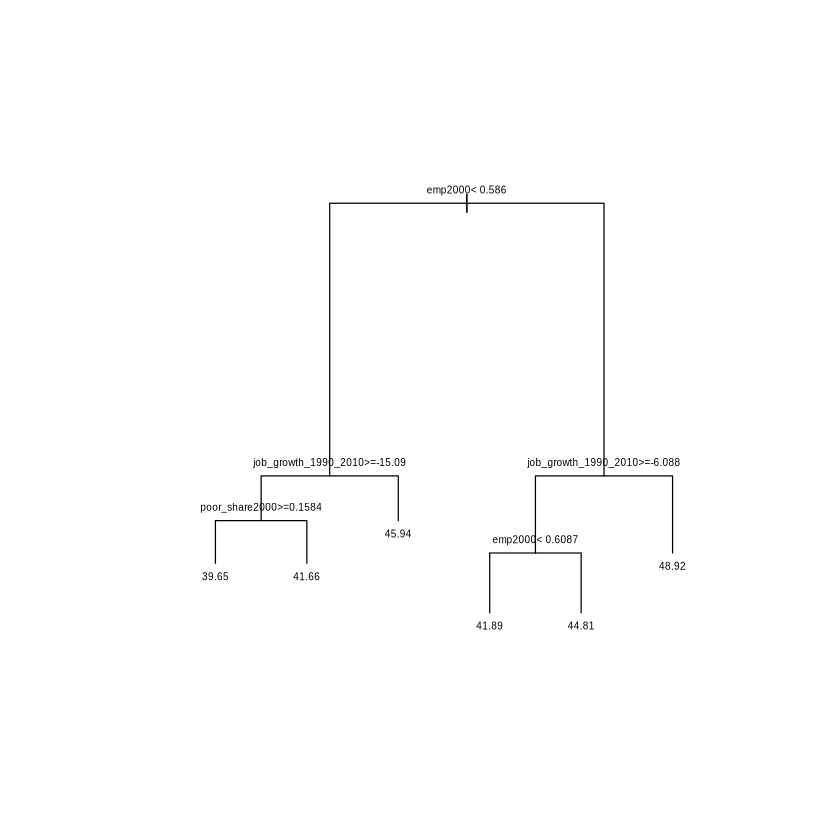

In [5]:
# QUESTION 5 Code

#Question 5.	Prediction using decision tree

#### Trees example: modify this code to complete the coding exercise
## Method is rpart()
## Depth 3
mobilitytree <- rpart(kfr_pooled_pooled_p25 ~ job_growth_1990_2010 + emp2000 + poor_share2000, 
                      data=train, 
                      maxdepth = 3, 
                      cp=0) 

#Options for rpart
#cp = complexity parameter, which controls the complexity of the tree. 0 is most complex.
#If cp>0 the tree will only grown if the increase in tree size improve the performance of the tree by at least cp.
#maxdepth = maximum depth of any node of the final tree, with the root node counted as depth 0
#Other tuning parameters that can be changed
#help("rpart.control")

#Visualize the fitted decision tree
plot(mobilitytree, margin = 0.2) # plot tree
text(mobilitytree, cex = 0.5) # add labels to tree

#Save figure
dev.copy(png,'figure1.png')
dev.off()

#Apply tree to predict Milwaukee, WI
summary(subset(mobility, cz == 24100))

#Calculate predictions for all rows in test and training samples
y_test_predictions_tree <- predict(mobilitytree, newdata=test)
y_train_predictions_tree <- predict(mobilitytree, newdata=train)

#Generate squared prediction errors
tree_performance_testset <- (test$kfr_pooled_pooled_p25 - y_test_predictions_tree)^2
tree_performance_trainset <- (train$kfr_pooled_pooled_p25 - y_train_predictions_tree)^2

#Report the root mean squared prediction error
rmspe_test_tree <- sqrt(mean(tree_performance_testset, na.rm=TRUE))
rmspe_train_tree <- sqrt(mean(tree_performance_trainset, na.rm=TRUE))

#Report the root mean squared prediction error
print(paste("The Root Mean Squared Percentage Error (RMSPE) for the test dataset is:", rmspe_test_tree))
print(paste("The Root Mean Squared Percentage Error (RMSPE) for the training dataset is:", rmspe_train_tree))

**Question 5 Answer**

A. Code for decision tree using same vairables as OLS is given above and the resultant tree created is shown. 
B. Using the decision tree above, we traverse to find that the predicted value for Milwaukee, WI is 48.92 whereas the actual value is 38.89. The prediction error is therefore approximately 10.03 (48.92-38.89). 
C, D, E. Codes given above calculate the predictions and the prediction errors for training and testing data.
F. As expected, the training data has a smaller RMSE value than the testing data (4.90 vs 6.12). The training data RMSE is slightly less than in the OLS case whereas the testing data RMSE is approximately the same. 

6. To conclude this week's lab, we will illustrate the overfit problem.
    The key issue in using a decision tree to make predictions is
    choosing how big of a tree you want to grow. How many splits in the
    tree? Or in other words, the depth of tree.

   Decision trees have a tendency to overfit the training data. By growing a bigger and bigger tree, we can drive the in-sample prediction error down to zero. The tree that minimizes the in-sample error would be a tree where each observation is in its own leaf. But that large decision tree is not likely to do well when trying to make an out of sample prediction. As with regression, it’s possible to fit our existing data perfectly but have terrible predictions for new data.

   To show this, fit a tree in R using rpart() with maximum depth maxdepth = 30, complexity parameter cp = 0, minimum number of observations in each leaf minbucket = 1, and the minimum number of observations in a leaf for a split to be attempted minsplit = 1. Calculate the **root mean squared prediction error** in the training data and the test data.

png 
  3

png 
  2

[1] "The Root Mean Squared Percentage Error (RMSPE) for the test dataset is: 7.77424406754692"
[1] "The Root Mean Squared Percentage Error (RMSPE) for the training dataset is: 0"


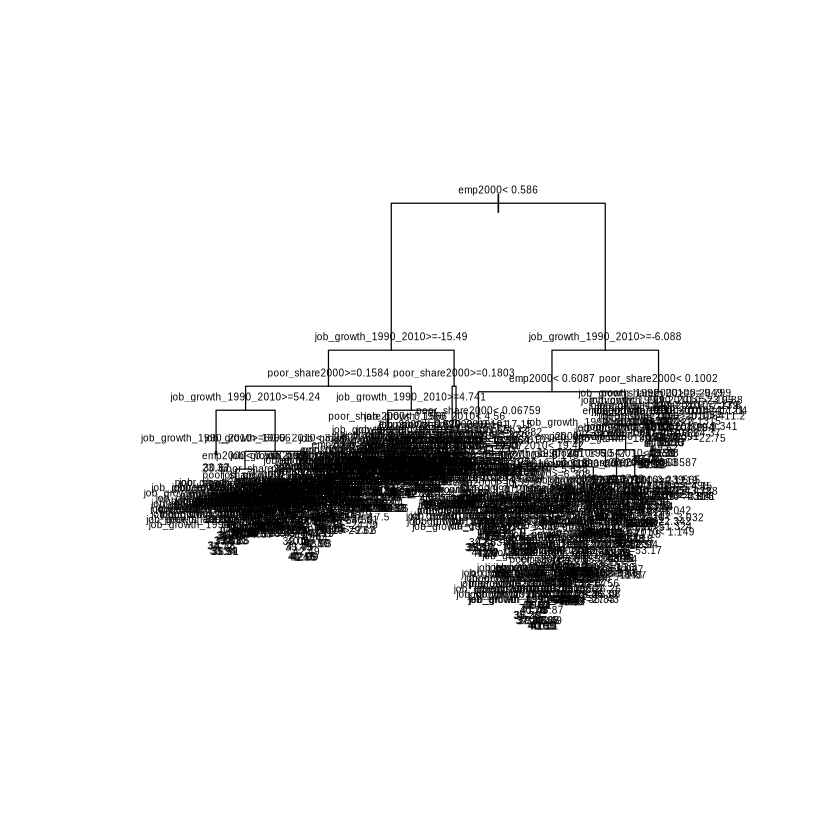

In [6]:
# QUESTION 6 Code

#Estimate large tree
big_tree <-rpart(kfr_pooled_pooled_p25 ~ job_growth_1990_2010 + emp2000 + poor_share2000, 
             data=train, 
             maxdepth = 30, 
             cp=0,  
             minsplit = 1, 
             minbucket = 1)

#Visualize the fitted decision tree
plot(big_tree, margin = 0.2) # plot tree
text(big_tree, cex = 0.5) # add labels to tree

#Save figure
dev.copy(png,'figure2.png')
dev.off()

#Calculate predictions for all rows in test and training samples
y_test_predictions_big_tree <- predict(big_tree, newdata=test)
y_train_predictions_big_tree <- predict(big_tree, newdata=train)

#Generate squared prediction errors
big_tree_performance_testset <- (test$kfr_pooled_pooled_p25 - y_test_predictions_big_tree)^2
big_tree_performance_trainset <- (train$kfr_pooled_pooled_p25 - y_train_predictions_big_tree)^2

#Report the root mean squared prediction error
rmspe_test_big_tree <- sqrt(mean(big_tree_performance_testset, na.rm=TRUE))
rmspe_train_big_tree <- sqrt(mean(big_tree_performance_trainset, na.rm=TRUE))

#Report the root mean squared prediction error
print(paste("The Root Mean Squared Percentage Error (RMSPE) for the test dataset is:", rmspe_test_big_tree))
print(paste("The Root Mean Squared Percentage Error (RMSPE) for the training dataset is:", rmspe_train_big_tree))

**Question 6 Answer**

The modified code above runs a big/overfit tree on the same three vairables. As expected, the training RMSE falls to 0 since the tree is overfit to this data and predicts accurately, whereas the testing error increases to 7.72 which is higher than both OLS and the smaller decision tree. 

7. Which of the three models – the linear regression, the small
    decision tree, or the big decision tree – performs best on the
    training sample? What about the test sample?

In [7]:
# QUESTION 7 Code

#Compare RMSPE for the three models in-sample
#Compare RMSPE for the three models in the pseudo out-of-sample
# Create a data frame to hold the RMSPE values
rmspe_table <- data.frame(
  Model = c("Big Tree", "Tree", "OLS"),
  RMSPE_Test_PsuedoOOS = c(rmspe_test_big_tree, rmspe_test_tree, rmspe_test_ols),
  RMSPE_Train_IS = c(rmspe_train_big_tree, rmspe_train_tree, rmspe_train_ols)
)

# Print the table
print(rmspe_table)

     Model RMSPE_Test_PsuedoOOS RMSPE_Train_IS
1 Big Tree             7.774244       0.000000
2     Tree             6.124329       4.898806
3      OLS             6.068430       5.130563


**Question 7 Answer**

As shown above, the table compares the RMSPE for training data (in sample) and testing data (psuedo out of sample) for the tree models - overfit big tree, simple tree, and OLS. 

8.  Create an annotated/commented do-file, .ipynb Jupyter Notebook, or
    .R file that can replicate all your analyses above. This will be the
    final code that you submit on Gradescope. The motivation for using
    do-files and .R files is described on [page 4](#Dofiles), which has
    been adapted from training materials used by [Innovations for
    Poverty Action (IPA)](https://www.poverty-action.org/) and the
    [Abdul Latif Jameel Poverty Action Lab
    (J-PAL)](https://www.povertyactionlab.org/).


**Final Submission Checklist for Lab 6**

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 49%" />
</colgroup>
<thead>
<tr class="header">
<th><strong>If you’re working with R</strong></th>
<th><strong>If you’re working with Stata</strong></th>
</tr>
</thead>
<tbody>
<tr class="odd">
<td><p>Lab 6 Write-Up:</p>
<ul>
<li><p><strong>PDF</strong> of your answers. For graphs, you must save them as images (e.g., .png files) and insert them into the document.</p></li>
</ul>
<p>Lab 6 Code:</p>
<ul>
<li><p><strong>.R script file</strong>, well-annotated replicating all your analyses;<br/><br/>OR</p></li>
<li><p><strong>.ipynb file</strong></p></li>
</ul></td>
<td><p>Lab 6 Write-Up:</p>
<ul>
<li><p><strong>PDF</strong> of your answers. For graphs, you must save them as images (e.g., .png files) and insert them into the document.</p></li>
</ul>
<p>Lab 6 Code:</p>
<ul>
<li><p><strong>do-file</strong>, well-annotated replicating all your analyses;<br/><br/>AND</p></li>
<li><p><strong>log-file, not a .smcl file,</strong> with the log showing the output generated by your final do-file.</p></li>
</ul></td>
</tr>
</tbody>
</table>

***If you’re working with an .ipynb notebook***

It is likely that your .ipynb file will be greater than 1 MB in size.
Therefore, for this assignment please submit both your *well-annotated*
**.ipynb file** and **a .PDF version of this file**. The notebook should
replicate all your analyses for Lab 5 (with enough comments that a
principal investigator on a research project would be able to follow and
understand what each step of the code is doing).

## How to submit your assignment

## What files to submit

|  |  |
|--|--|
| **If you’re using Python Notebook to write your R code, and a document editor to write your answers** <br><br> 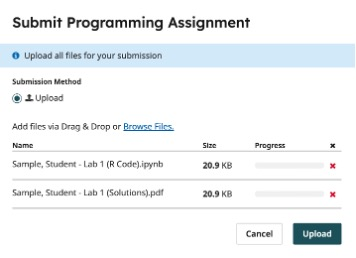| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>Submit your answers as a .pdf file. **Do not submit a .doc/.docx file (Word document)**, as we are unable to read those files on Gradescope.</li></ul><br>_For graphs, always be sure to save them as images (e.g., .png files) and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|
| **If you’re using a Python Notebook to write your R code AND to write your answers** <br><br> 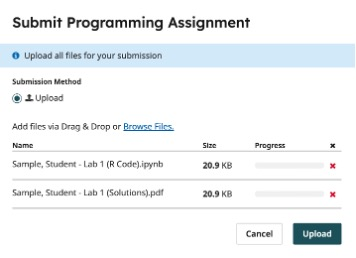| <ul><li>Submit your .ipynb R code file replicating all your analyses above (with enough comments that a principal investigator on a research project would be able to follow and understand what each step of the code is doing). We need your raw code so that we can run your code ourselves if needed.</li><li>Submit the .pdf version of your .ipynb file.</li></ul><br>_For graphs, always be sure to save them as images (either in the cell output or as separate images, such as .png files) and insert them into the answer document even if it was not explicitly asked._<br><br>**Important:** If we do not have both your .ipynb code and .pdf answer files, you will lose 1 out of the 3 lab assignment points.<br><br>**Do not submit ONLY the .ipynb file**, as we might have trouble reading your answers using those files on Gradescope.<br><br><span style="color:crimson">**Word of caution:**</span> <u>**Do not**</u> use Python to perform your analysis in this Lab, unless when explicitly instructed. You will receive no points if you’re not using R or Stata for your analysis.|png)|

## WHAT ARE DO-FILES AND .R FILES AND WHY DO WE NEED ONE?<span id="Dofiles" class="anchor"></span>

*Let’s imagine the following situation - you just found out you have to
present your results to a partner– all the averages you produced and
comparisons you made. Suppose you also found out that the data you had
used to produce all these results was not completely clean, and have
only just fixed it. You now have incorrect numbers and need to re-do
everything.*

*How would you go about it? Would you reproduce everything you did for
Lab 1 from scratch? Can you do it? How long would it take you to do?
Just re-typing all those commands into Stata or R in order and checking
them would take an hour.*

*An important feature of any good research project is that the results
should be reproducible. For Stata and R the easiest way to do this is to
create a text file that lists all your commands in order, so anyone can
re-run all your Stata or R work on a project anytime. Such text files
that are produced within Stata or linked to Stata are called do-files,
because they have an extension .do (like intro_exercise.do). Similarly,
in R, these files are called .R files because they have an extension of
.R. These files feed commands directly into Stata or R without you
having to type or copy them into the command window.*

*An added bonus is that having do-files and .R files makes it very easy
to fix your typos, re-order commands, and create more complicated chains
of commands that wouldn’t work otherwise. You can now quickly reproduce
your work, correct it, adjust it, and build on it.*

*Finally, do-files and .R files make it possible for multiple people to
work on a project, which is necessary for collaborating with others or
when you hand off a project to someone else.*

## DATA DESCRIPTION, FILE: mobility.dta

The data consist of $N = 741$ Commuting Zones. Commuting zones are
geographical aggregations of counties that are similar to metro areas
but cover the entire U.S., including rural areas. Commuting zones are
meant to consist of local labor markets where people both live and work.
For more details on the construction of the variables included in this
data set, please see [Chetty, Raj, John Friedman, Nathaniel Hendren,
Maggie R. Jones, and Sonya R. Porter. 2018. “The Opportunity Atlas:
Mapping the Childhood Roots of Social Mobility.” NBER Working Paper No.
25147](https://opportunityinsights.org/wp-content/uploads/2018/10/atlas_paper.pdf).

**TABLE 1**<span id="Table1" class="anchor"></span>

Variable Definitions

<table>
<colgroup>
<col style="width: 4%" />
<col style="width: 24%" />
<col style="width: 27%" />
<col style="width: 6%" />
<col style="width: 8%" />
<col style="width: 8%" />
<col style="width: 10%" />
<col style="width: 9%" />
</colgroup>
<tbody>
<tr class="odd">
<td></td>
<td>Variable</td>
<td>Description</td>
<td>Obs.</td>
<td>Mean</td>
<td>St. Dev.</td>
<td>Min</td>
<td>Max</td>
</tr>
<tr class="even">
<td></td>
<td>(1)</td>
<td>(2)</td>
<td>(3)</td>
<td>(4)</td>
<td>(5)</td>
<td>(6)</td>
<td>(7)</td>
</tr>
<tr class="even">
<td>1</td>
<td><em>cz</em></td>
<td>Five-digit 1990 commuter zone code</td>
<td>741</td>
<td>n/a</td>
<td>n/a</td>
<td>n/a</td>
<td>n/a</td>
</tr>
<tr class="odd">
<td>2</td>
<td><em>cz_name</em></td>
<td>String variable consisting of the name of the commuting zone.</td>
<td>741</td>
<td>n/a</td>
<td>n/a</td>
<td>n/a</td>
<td>n/a</td>
</tr>
<tr class="even">
<td>3</td>
<td><em>kfr_pooled_pooled_p25</em></td>
<td>Absolute Mobility at the 25th Percentile</td>
<td>741</td>
<td>42.99</td>
<td>5.994</td>
<td>23.33</td>
<td>66.63</td>
</tr>
<tr class="odd">
<td>4</td>
<td><em>bowl_per_capita</em></td>
<td>Bowling Alleys per 100,000 residents</td>
<td>741</td>
<td>3.928</td>
<td>5.661</td>
<td>0</td>
<td>70.50</td>
</tr>
<tr class="even">
<td>5</td>
<td><em>singleparent_share1990</em></td>
<td>Share of Single-Headed Households with Children 1990</td>
<td>741</td>
<td>0.197</td>
<td>0.0503</td>
<td>0.0433</td>
<td>0.441</td>
</tr>
<tr class="odd">
<td>6</td>
<td><em>singleparent_share2000</em></td>
<td>Share of Single-Headed Households with Children 2000</td>
<td>741</td>
<td>0.268</td>
<td>0.0563</td>
<td>0.105</td>
<td>0.547</td>
</tr>
<tr class="even">
<td>7</td>
<td><em>singleparent_share2010</em></td>
<td><em>Share of Single-Headed Households with Children 2006-2010 ACS</em></td>
<td>741</td>
<td>0.315</td>
<td>0.0687</td>
<td>0.109</td>
<td>0.573</td>
</tr>
<tr class="odd">
<td>8</td>
<td><em>hhinc_mean2000</em></td>
<td>Mean Household Income 2000</td>
<td>741</td>
<td>65,137</td>
<td>12,755</td>
<td>38,817</td>
<td>122,288</td>
</tr>
<tr class="even">
<td>9</td>
<td><em>mean_commutetime2000</em></td>
<td>Average Commute Time of Working Adults in 2000</td>
<td>741</td>
<td>21.97</td>
<td>4.548</td>
<td>7.383</td>
<td>40.24</td>
</tr>
<tr class="odd">
<td>10</td>
<td><em>frac_coll_plus2000</em></td>
<td>Fraction of Residents w/ a College Degree or More in 2000</td>
<td>741</td>
<td>0.181</td>
<td>0.0639</td>
<td>0.0488</td>
<td>0.481</td>
</tr>
<tr class="even">
<td>11</td>
<td><em>frac_coll_plus2010</em></td>
<td>Fraction of Residents w/ a College Degree or More in 2006-2010 ACS</td>
<td>741</td>
<td>0.204</td>
<td>0.0695</td>
<td>0.0764</td>
<td>0.481</td>
</tr>
<tr class="odd">
<td>12</td>
<td><em>foreign_share2010</em></td>
<td>Share of Population Born Outside the U.S. in 2006-2010 ACS</td>
<td>741</td>
<td>0.0517</td>
<td>0.0622</td>
<td>0.000817</td>
<td>0.722</td>
</tr>
<tr class="even">
<td>13</td>
<td><em>med_hhinc1990</em></td>
<td>Median Household Income in 1990</td>
<td>741</td>
<td>24,973</td>
<td>6,371</td>
<td>12,097</td>
<td>51,112</td>
</tr>
<tr class="odd">
<td>14</td>
<td><em>med_hhinc2016</em></td>
<td>Median Household Income in 2016</td>
<td>741</td>
<td>48,983</td>
<td>10,936</td>
<td>26,645</td>
<td>103,043</td>
</tr>
<tr class="even">
<td>15</td>
<td><em>poor_share2010</em></td>
<td>Share Below Poverty Line 2006-2010 ACS</td>
<td>741</td>
<td>0.160</td>
<td>0.0541</td>
<td>0.0500</td>
<td>0.442</td>
</tr>
<tr class="odd">
<td>16</td>
<td><em>poor_share2000</em></td>
<td>Share Below Poverty Line 2000</td>
<td>741</td>
<td>0.145</td>
<td>0.0569</td>
<td>0.0540</td>
<td>0.460</td>
</tr>
<tr class="even">
<td>17</td>
<td><em>poor_share1990</em></td>
<td>Share Below Poverty Line 1990</td>
<td>741</td>
<td>0.165</td>
<td>0.0703</td>
<td>0.0515</td>
<td>0.505</td>
</tr>
<tr class="odd">
<td>18</td>
<td><em>share_white2010</em></td>
<td>Share White 2010</td>
<td>741</td>
<td>0.758</td>
<td>0.197</td>
<td>0.0286</td>
<td>0.986</td>
</tr>
<tr class="even">
<td>19</td>
<td><em>share_black2010</em></td>
<td>Share Black 2010</td>
<td>741</td>
<td>0.0846</td>
<td>0.123</td>
<td>0.00151</td>
<td>0.697</td>
</tr>
<tr class="odd">
<td>20</td>
<td><em>share_hisp2010</em></td>
<td>Share Hispanic 2010</td>
<td>741</td>
<td>0.0999</td>
<td>0.145</td>
<td>0.00249</td>
<td>0.957</td>
</tr>
<tr class="even">
<td>21</td>
<td><em>share_asian2010</em></td>
<td>Share Asian 2010</td>
<td>741</td>
<td>0.0132</td>
<td>0.0328</td>
<td>0.000414</td>
<td>0.428</td>
</tr>
<tr class="odd">
<td>22</td>
<td><em>share_black2000</em></td>
<td>Share Black 2000</td>
<td>741</td>
<td>0.0773</td>
<td>0.118</td>
<td>0</td>
<td>0.646</td>
</tr>
<tr class="even">
<td>23</td>
<td><em>share_white2000</em></td>
<td>Share White 2000</td>
<td>741</td>
<td>0.795</td>
<td>0.188</td>
<td>0.0365</td>
<td>0.991</td>
</tr>
<tr class="odd">
<td>24</td>
<td><em>share_hisp2000</em></td>
<td>Share Hispanic 2000</td>
<td>741</td>
<td>0.0755</td>
<td>0.133</td>
<td>0.00186</td>
<td>0.948</td>
</tr>
<tr class="even">
<td>25</td>
<td><em>share_asian2000</em></td>
<td>Share Asian 2000</td>
<td>741</td>
<td>0.0107</td>
<td>0.0313</td>
<td>0.000244</td>
<td>0.455</td>
</tr>
<tr class="odd">
<td>26</td>
<td><em>gsmn_math_g3_2013</em></td>
<td>Average School District Level Standardized Test Scores in 3rd Grade in 2013</td>
<td>741</td>
<td>3.190</td>
<td>0.652</td>
<td>-0.661</td>
<td>4.960</td>
</tr>
<tr class="even">
<td>27</td>
<td><em>rent_twobed2015</em></td>
<td>Average Rent for Two-Bedroom Apartment in 2015</td>
<td>741</td>
<td>704.3</td>
<td>185.9</td>
<td>336.0</td>
<td>1,652</td>
</tr>
<tr class="odd">
<td>28</td>
<td><em>traveltime15_2010</em></td>
<td>Share of Working Adults w/ Commute Time of 15 Minutes Or Less in 2006-2010 ACS</td>
<td>741</td>
<td>0.450</td>
<td>0.143</td>
<td>0.152</td>
<td>0.991</td>
</tr>
<tr class="even">
<td>29</td>
<td><em>emp2000</em></td>
<td>Employment Rate 2000</td>
<td>741</td>
<td>0.578</td>
<td>0.0639</td>
<td>0.323</td>
<td>0.756</td>
</tr>
<tr class="odd">
<td>30</td>
<td><em>mail_return_rate2010</em></td>
<td>Census Form Rate Return Rate 2010</td>
<td>741</td>
<td>79.82</td>
<td>5.205</td>
<td>47.80</td>
<td>88.98</td>
</tr>
<tr class="even">
<td>31</td>
<td><em>popdensity2010</em></td>
<td>Population Density (per square mile) in 2010</td>
<td>741</td>
<td>109.4</td>
<td>284.0</td>
<td>0.106</td>
<td>5,636</td>
</tr>
<tr class="odd">
<td>32</td>
<td><em>popdensity2000</em></td>
<td>Population Density (per square mile) in 2000</td>
<td>741</td>
<td>101.3</td>
<td>271.0</td>
<td>0.0833</td>
<td>5,506</td>
</tr>
<tr class="even">
<td>33</td>
<td><em>job_growth_1990_2010</em></td>
<td>Job Growth Rate 1990-2010</td>
<td>741</td>
<td>13.54</td>
<td>21.56</td>
<td>-36.52</td>
<td>148.2</td>
</tr>
<tr class="odd">
<td>34</td>
<td><p><em>ann_avg_job_growth</em></p>
<p><em>_2004_2013</em></p></td>
<td>Average Annual Job Growth Rate 2004-2013</td>
<td>741</td>
<td>-0.001</td>
<td>0.0134</td>
<td>-0.0827</td>
<td>0.107</td>
</tr>
<tr class="even">
<td>35</td>
<td><em>job_density_2013</em></td>
<td>Job Density (in square miles) in 2013</td>
<td>741</td>
<td>50.28</td>
<td>133.6</td>
<td>0.0425</td>
<td>2,595</td>
</tr>
</tbody>
</table>